In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
df.drop(['RowNumber','CustomerId','Surname'],axis = 'columns', inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [35]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [36]:
df.Gender.replace({'Female':1, 'Male':0}, inplace = True)

In [37]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [38]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [39]:
df1 = pd.get_dummies(data = df, columns = ['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [40]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

In [41]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9979,677,1,58,1,90022.85,1,0,1,2988.28,0,1,0,0
3203,719,0,69,3,0.00,2,1,1,58320.06,0,1,0,0
5579,686,0,22,8,0.00,2,0,0,142331.85,0,0,0,1
2198,473,0,48,8,0.00,2,1,0,71139.80,0,0,0,1
6106,762,0,28,3,125155.83,2,1,1,106024.02,0,0,1,0


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])

In [43]:
df1[columns_to_scale].sample(5)

,CreditScore,Age,Tenure,Balance,EstimatedSalary
4633,0.254,0.405405,0.8,0.515149,0.789704
9506,0.664,0.689189,0.6,0.000000,0.748034
2083,0.368,0.081081,0.1,0.000000,0.848290
9180,0.574,0.351351,0.2,0.000000,0.748342
5623,0.472,0.324324,0.6,0.000000,0.617052


In [44]:
X = df1.drop('Exited', axis = 'columns')
y = df1.Exited

X.shape

(10000, 12)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [46]:
X_train.shape

(8000, 12)

In [47]:
X_test.shape

(2000, 12)

In [50]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(8, input_shape = (12,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])


In [52]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4460 - accuracy: 0.8073
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8138
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.8171
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8126
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8126
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8122
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8181
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8123
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8107
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4237 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8679
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8620
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8611
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8587
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8588
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8650
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8601
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8628
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8566
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 

In [53]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8535


[0.3599732220172882, 0.8535000085830688]

In [63]:
y_predict = model.predict(X_test)
y_predict[19:30]

array([[0.12729707],
       [0.01440135],
       [0.11455888],
       [0.00812954],
       [0.05526465],
       [0.37438956],
       [0.07602432],
       [0.4635888 ],
       [0.2872567 ],
       [0.00771904],
       [0.04433116]], dtype=float32)

In [65]:
y_pred = []

for each in y_predict:
    if each > 0.25:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:30]

[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]

In [69]:
y_test[200:210]

1650    0
8456    0
7164    0
8894    0
1350    0
7886    0
3430    0
4249    0
6063    0
3483    0
Name: Exited, dtype: int64

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1595
           1       0.50      0.68      0.57       405

    accuracy                           0.80      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.83      0.80      0.81      2000



Text(69.0, 0.5, 'Truth')

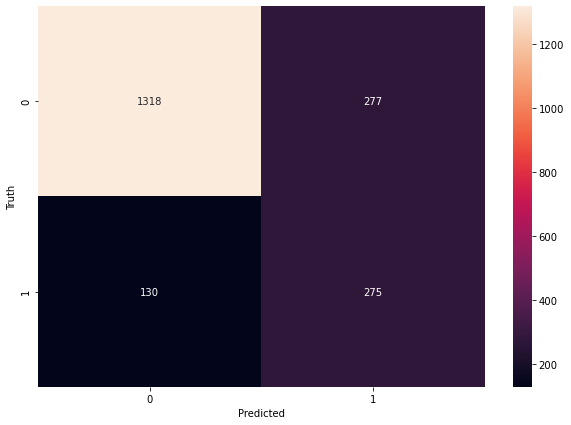

In [72]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels= y_test, predictions = y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')